In [30]:

%matplotlib inline
# from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)


2.8.0


In [31]:
# try:
#         # Connect Google Colab instance to Google Drive
#         from google.colab import drive
#         drive.mount('/gdrive')
#         # Load the dataset (you already have created in the other notebook) from Google Drive
#         !cp /gdrive/My\ Drive/Colab\ Notebooks/leapGestRecog.zip
# except:
#         print("You're not in a Google Colab!")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
cp: missing destination file operand after '/gdrive/My Drive/Colab Notebooks/leapGestRecog.zip'
Try 'cp --help' for more information.


In [1]:
for j in os.listdir("/"):
    print(j)


$Recycle.Bin
$WinREAgent
Documents and Settings
DumpStack.log.tmp
hiberfil.sys
OneDriveTemp
pagefile.sys
PerfLogs
Program Files
Program Files (x86)
ProgramData
Recovery
swapfile.sys
System Volume Information
Users
Windows


In [89]:
!cp handrecognition_model.h5 /gdrive/MyDrive

In [52]:
!unzip /gdrive/MyDrive/Colab\ Notebooks/leapGestRecog.zip -d /gdrive/MyDrive/Colab\ Notebooks

Streaming output truncated to the last 5000 lines.
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0027.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0028.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0029.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0030.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0031.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0032.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0033.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0034.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/

In [55]:
# We need to get all the paths for the images to later load them
imagepaths = []
print("ii",os.walk("/gdrive/MyDrive/Colab Notebooks", topdown=False))
# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog", topdown=False): 
  print(root,"hii", dirs,"he", files)
  for name in files:
    path = os.path.join(root, name)

    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

ii <generator object walk at 0x7fa958b112d0>
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/00/01_palm hii [] he ['frame_00_01_0001.png', 'frame_00_01_0002.png', 'frame_00_01_0003.png', 'frame_00_01_0004.png', 'frame_00_01_0005.png', 'frame_00_01_0006.png', 'frame_00_01_0007.png', 'frame_00_01_0008.png', 'frame_00_01_0009.png', 'frame_00_01_0010.png', 'frame_00_01_0011.png', 'frame_00_01_0012.png', 'frame_00_01_0013.png', 'frame_00_01_0014.png', 'frame_00_01_0015.png', 'frame_00_01_0016.png', 'frame_00_01_0017.png', 'frame_00_01_0018.png', 'frame_00_01_0019.png', 'frame_00_01_0020.png', 'frame_00_01_0021.png', 'frame_00_01_0022.png', 'frame_00_01_0023.png', 'frame_00_01_0024.png', 'frame_00_01_0025.png', 'frame_00_01_0026.png', 'frame_00_01_0027.png', 'frame_00_01_0028.png', 'frame_00_01_0029.png', 'frame_00_01_0030.png', 'frame_00_01_0031.png', 'frame_00_01_0032.png', 'frame_00_01_0033.png', 'frame_00_01_0034.png', 'frame_00_01_0035.png', 'frame_00_01_0036.png', 'frame_00

In [56]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


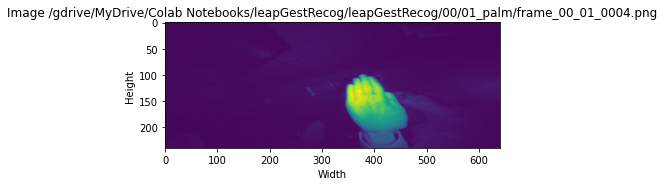

In [57]:
plot_image(imagepaths[3]) #We plot the first image from our imagepaths array

In [60]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  category = path.split("/")[6]
  print(path,category)
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Streaming output truncated to the last 5000 lines.
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0004.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0005.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0006.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0007.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0008.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0009.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0010.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0011.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0012.png 07
/gdrive/MyDrive/Colab Notebooks/leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0

In [61]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [62]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [63]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [64]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [65]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 1025s - loss: 0.7583 - accuracy: 0.9216 - val_loss: 0.0291 - val_accuracy: 0.9890 - 1025s/epoch - 5s/step
Epoch 2/5
219/219 - 990s - loss: 0.0183 - accuracy: 0.9911 - val_loss: 0.0198 - val_accuracy: 0.9917 - 990s/epoch - 5s/step
Epoch 3/5
219/219 - 996s - loss: 0.0155 - accuracy: 0.9916 - val_loss: 0.0143 - val_accuracy: 0.9915 - 996s/epoch - 5s/step
Epoch 4/5
219/219 - 985s - loss: 0.0140 - accuracy: 0.9918 - val_loss: 0.0127 - val_accuracy: 0.9917 - 985s/epoch - 4s/step
Epoch 5/5
219/219 - 989s - loss: 0.0130 - accuracy: 0.9919 - val_loss: 0.0121 - val_accuracy: 0.9918 - 989s/epoch - 5s/step


In [66]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

In [76]:
!ls

 1hNmPUl0B8PDbv-Ndu99HsWY2LPp3kBIB     handrecognition_model.h5
 1hNmPUl0B8PDbv-Ndu99HsWY2LPp3kBIB.1   sample_data
 drive				      'view?usp=sharing'


In [67]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

188/188 [==============================] - 97s 518ms/step - loss: 0.0121 - accuracy: 0.9918
Test accuracy: 99.18%


In [68]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [70]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

(5, 5)

In [71]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

In [72]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [73]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,565,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,624,0,0,0,0,0,0,0,0
Actual L,0,0,564,0,0,26,0,0,0,0
Actual Fist (H),0,0,0,610,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,628,0,0,0,0,0
Actual Thumbs up,0,0,23,0,0,561,0,0,0,0
Actual Index,0,0,0,0,0,0,618,0,0,0
Actual OK,0,0,0,0,0,0,0,618,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,580,0
Actual C,0,0,0,0,0,0,0,0,0,583
